# <center>SNN with Multiple Dimension Input</center>

<div align="center">
    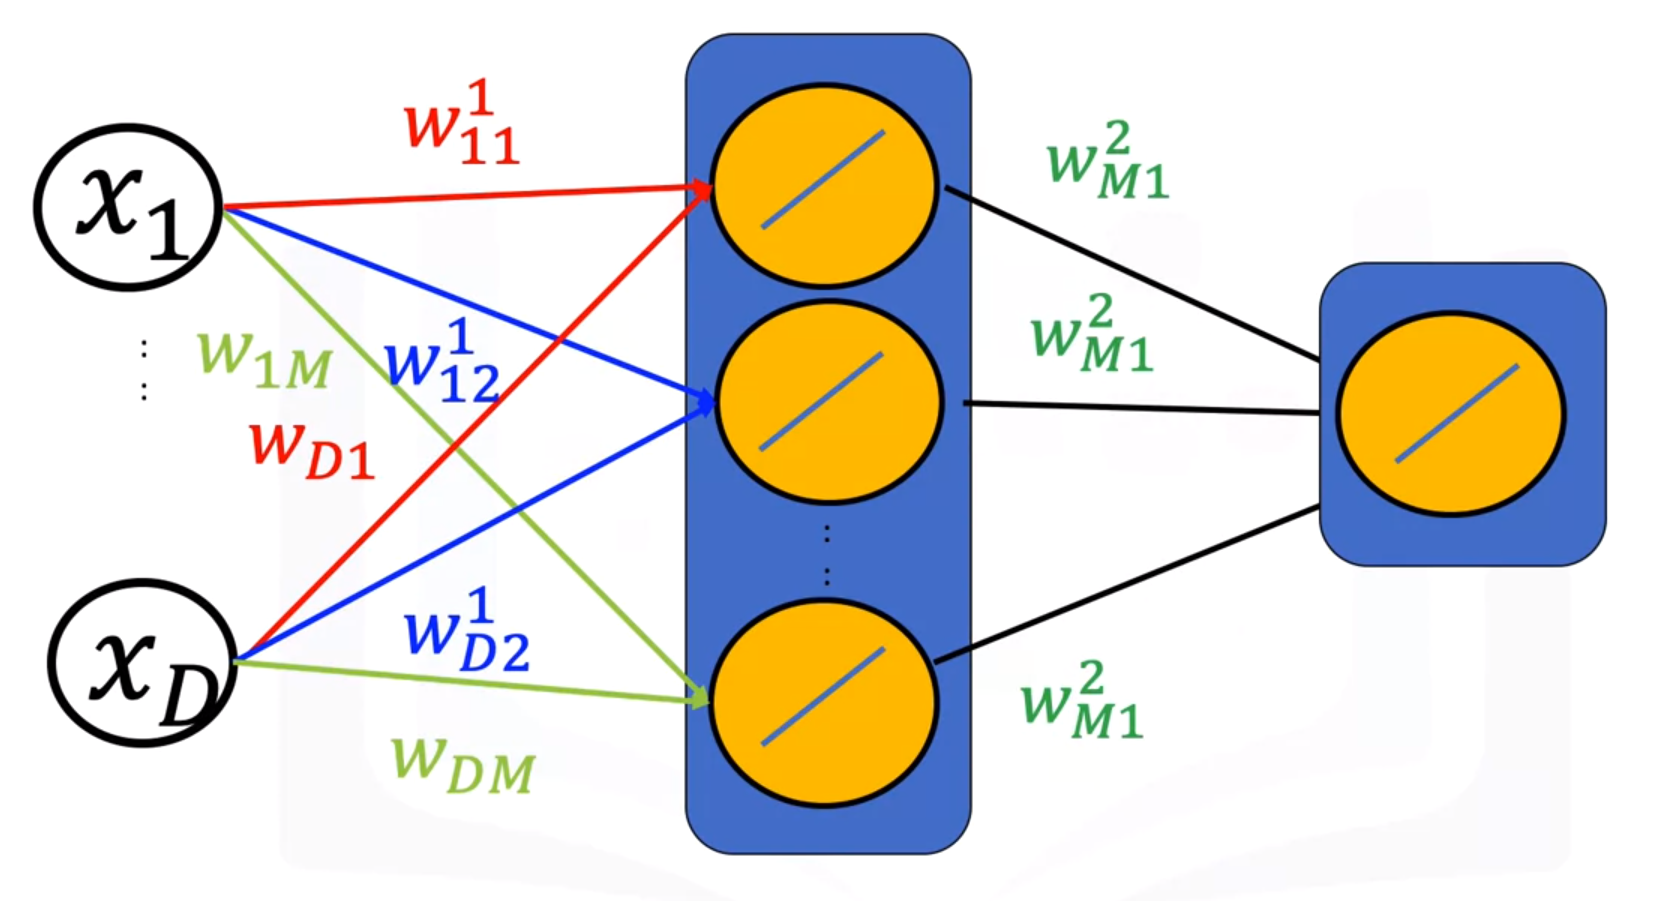
</div>

+ Sample có 2 thuộc tính
+ Có 4 Neural ở tầng ẩn, 1 Neural ở tầng đầu ra
+ Dùng hàm tác động Sigmoid

In [156]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim, sigmoid
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as listed_colormap
# from mpl_toolkits.mplot3d import scatter    # Dùng để vẽ 3D Plot
torch.manual_seed(0)

## Create Dataset

In [186]:
class Data(Dataset):
    def __init__(self):
        self.X = torch.zeros(40, 2)    # Tensor 2D
        self.y = torch.zeros(40, 1)    # Tensor 2D
        for i,x in enumerate(self.X):
            if i < 10: 
                self.X[i] = torch.Tensor([0., 0.])
                self.y[i] = torch.Tensor([1.])
            elif i>=10 and i<20: 
                self.X[i] = torch.Tensor([1., 0.])
                self.y[i] = torch.Tensor([0.])
            elif i>=20 and i<30: 
                self.X[i] = torch.Tensor([0., 1.])
                self.y[i] = torch.Tensor([0.])
            else: 
                self.X[i] = torch.Tensor([1., 1.])
                self.y[i] = torch.Tensor([1.])
        
        self.X = self.X + 0.05 * torch.randn(self.X.shape)
    
    def __getitem__(self, index):
        return self.X[index, :], self.y[index]
    
    def __len__(self):
        return self.X.shape[0]
    
    # Vẽ biểu đồ dữ liệu
    def plot_data(self):
        x1 = self.X[:, 0]
        x2 = self.X[:, 1]
        y = self.y[:].view(-1)
        
        # Vẽ data trong ko gian 3D
        ax = plt.figure().add_subplot(projection='3d')
        color = np.where(y.numpy()==0, 'red', 'blue')
        ax.scatter(x1.numpy(), x2.numpy(), y.numpy(), c=color)   
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')
        plt.show()
        
        # Biểu diễn phân bổ dữ liệu trong mặt phẳng 2D, theo giá trị thuộc tính X
        plt.plot(x1[y==1], x2[y==1], 'ro')
        plt.plot(x1[y==0], x2[y==0], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2', rotation=0)
        
        
        plt.show()

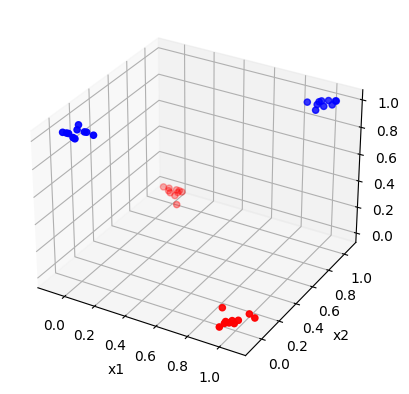

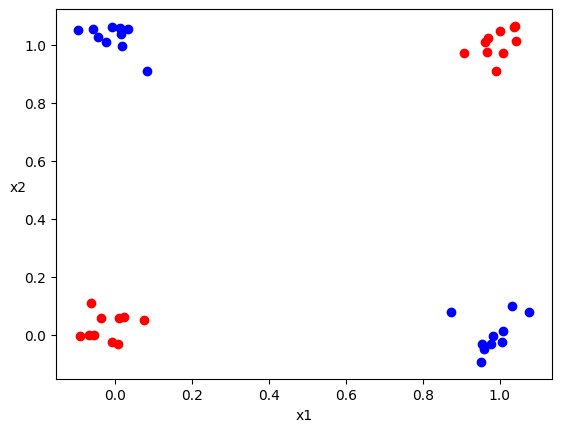

In [187]:
data = Data()      # Tạo dữ liệu
data.plot_data()

## Create Module

In [188]:
class SNN(nn.Module):
    def __init__(self, input_size, H, output_size):
        super(SNN, self).__init__()
        self.linear1 = nn.Linear(input_size, H)    # hidden layer 
        self.linear2 = nn.Linear(H, output_size)   # output layer
    
    def forward(self, x):
        x = sigmoid(self.linear1(x))
        yhat = sigmoid(self.linear2(x))
        return yhat

criterion = nn.BCELoss()

In [174]:
model = SNN(2, 4, 1)
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.3706,  0.5710],
                      [-0.5739, -0.0508],
                      [ 0.6995,  0.2554],
                      [ 0.0200, -0.6128]])),
             ('linear1.bias', tensor([ 0.3503, -0.5037, -0.2007, -0.2372])),
             ('linear2.weight',
              tensor([[-0.0740,  0.0055,  0.4124,  0.0624]])),
             ('linear2.bias', tensor([0.4478]))])

## Create DataLoader, Optimazer

In [175]:
trainloader = DataLoader(dataset=data, batch_size=1)
optimazer = optim.SGD(model.parameters(), lr=0.01)

## Create Accurancy
Độ chính xác trên toàn bộ tập học

In [176]:
def accurancy(model, data):
    X = data[:][0]
    y = data[:][0]
    yhat = model(X)   # yhat này mới chỉ là xs của sample với label 0 thôi
    yhat = yhat > 0.5    # đây mới là label của các sample; 1=True, 0=False
    correct = (yhat==y).sum().item() / len(data)
    return correct

# def accuracy(model, data_set):
#     return np.mean(data_set.y.view(-1).numpy() == (model(data_set.X)[:, 0] > 0.5).numpy())

## Training

In [181]:
COST = []
acc = []
def training(epochs):
    for epoch in range(epochs):
        total = 0    # 
        for X,y in trainloader:
            yhat = model(X)
            loss = criterion(yhat.view(-1), y.view(-1))
            optimazer.zero_grad()
            loss.backward()
            optimazer.step()
            total += loss.item()
        COST.append(total)
        acc.append(accurancy(model, data))
        
training(500)

In [182]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.3479,  0.5543],
                      [-0.5718, -0.0432],
                      [ 0.6741,  0.2374],
                      [ 0.0260, -0.6150]])),
             ('linear1.bias', tensor([ 0.3545, -0.5006, -0.2353, -0.2368])),
             ('linear2.weight',
              tensor([[-0.2341, -0.0921,  0.2022, -0.0921]])),
             ('linear2.bias', tensor([0.0976]))])

## Plot Module
+ Plot Accurancy, Cost
+ Plot Model

In [183]:
def plot_acc_cost(acc, COST, epochs):
    plt.plot(range(epochs), acc, color='red', label='accurency')
    plt.plot(range(epochs), COST, color='blue', label='COST')
    plt.legend()
    plt.show()

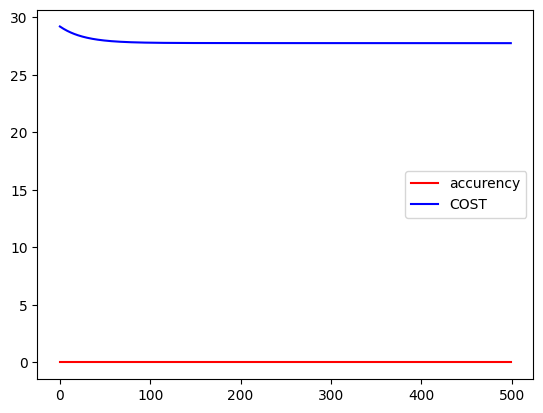

In [185]:
plot_acc_cost(acc, COST, 500)

In [155]:
a = model(torch.Tensor(1, 2)).view(-1)
a

tensor([0.4686], grad_fn=<ViewBackward0>)